In [0]:
from __future__ import print_function
!pip install numpy==1.16.1
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.datasets import imdb

import matplotlib.pyplot as plt


In [0]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



Loading data...
25000 train sequences
25000 test sequences


Pad sequences (samples x time)


W0820 11:39:35.695738 139826298955648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 11:39:35.732942 139826298955648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 11:39:35.740833 139826298955648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...


W0820 11:39:36.114781 139826298955648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 11:39:36.138533 139826298955648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0820 11:39:36.145843 139826298955648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, None, 32)          15456     
_________________________________________________________________
gru_2 (GRU)                  (None, 1)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2,575,560
Trainable params: 2,575,560
Non-trainable params: 0
_________________________________________________________________
None
Train...


W0820 11:39:37.661556 139826298955648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 256s 10ms/step - loss: 0.5419 - acc: 0.7874 - val_loss: 0.4744 - val_acc: 0.8238
Epoch 2/25
25000/25000 [==============================] - 251s 10ms/step - loss: 0.3915 - acc: 0.8682 - val_loss: 0.3917 - val_acc: 0.8489
Epoch 3/25
25000/25000 [==============================] - 251s 10ms/step - loss: 0.2998 - acc: 0.9007 - val_loss: 0.4368 - val_acc: 0.8256
Epoch 4/25
25000/25000 [==============================] - 251s 10ms/step - loss: 0.2461 - acc: 0.9174 - val_loss: 0.4040 - val_acc: 0.8470
Epoch 5/25
25000/25000 [==============================] - 251s 10ms/step - loss: 0.2049 - acc: 0.9330 - val_loss: 0.3706 - val_acc: 0.8564
Epoch 6/25
25000/25000 [==============================] - 251s 10ms/step - loss: 0.1735 - acc: 0.9433 - val_loss: 0.3771 - val_acc: 0.8530
Epoch 7/25
25000/25000 [==============================] - 250s 10ms/step - loss: 0.1456 - acc: 0.9529 - val_loss: 0.

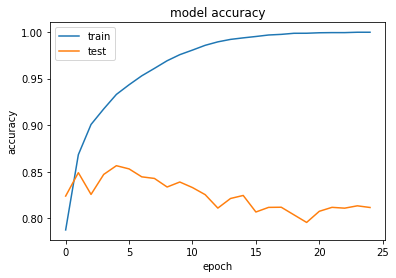

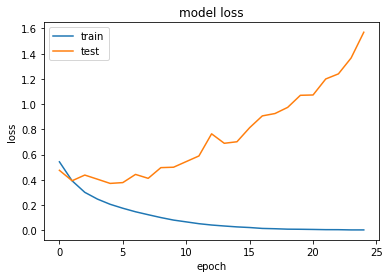

In [0]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)



print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(32, return_sequences = True))
model.add(GRU(1, return_sequences = False))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=25, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()